# Consignes

Vous devez réaliser les tâches suivantes :

- Charger les données
- Créer différents classifieurs (au moins 3)
- Effectuer une validation croisée sur les différents classifieurs
- Afficher les différentes performances


In [1]:
from sklearn.metrics import jaccard_similarity_score, f1_score 
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### data loading/sampling

In [2]:
from sklearn.datasets import fetch_rcv1
rcv1 = fetch_rcv1()

In [3]:
X_train_full, y_train_full = fetch_rcv1(subset="train", return_X_y=True)
X_test_full, y_test_full = fetch_rcv1(subset="test", return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold

X_train,_ , y_train, _ = train_test_split(X_train_full, y_train_full, test_size=0.98)
X_test,_ , y_test, _ = train_test_split(X_test_full, y_test_full, test_size=0.999)

In [5]:
# X_train = X_train_full[:1000]
# y_train = y_train_full[:1000]
# X_test = X_test_full[:1000]
# y_test = y_test_full[:1000] 

X_train_d = X_train.toarray()
y_train_d = y_train.toarray()
X_test_d = X_test.toarray()
y_test_d = y_test.toarray()

In [6]:
X_train_d.shape

(462, 47236)

In [7]:
X_test_d.shape

(781, 47236)

In [8]:
y_train_df = pd.DataFrame(y_train_d)
# y_train_df.describe()

### baseline

In [9]:
index = ["random_baseline","mean_baseline"]
columns = ["full_jaccard","full_f1","sub_jaccard","sub_f1"]
results = pd.DataFrame(index=index,columns=columns)

In [10]:
print("In average, an article of the full training dataset belong two {} \
different categories".format(y_train_full.sum(axis=1).mean()))

In average, an article of the full training dataset belong two 3.1835932437686294 different categories


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

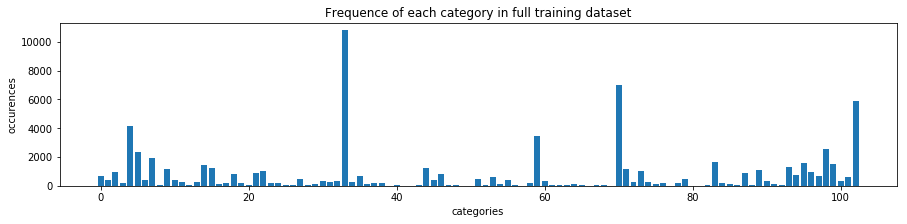

In [11]:
plt.figure(figsize=(15,3))
plt.bar(np.arange(y_train_full.shape[1]),y_train_full.sum(axis=0).tolist()[0])
plt.xlabel("categories")
plt.ylabel("occurences")
plt.title("Frequence of each category in full training dataset")
plt.xticks()

In [12]:
# We decide to use the three most frequent categories as our baseline classifier
y_mean_pred_full = np.zeros(y_test_full.shape)
y_mean_pred = np.zeros(y_test.shape)

y_mean_pred_full[:,33] = y_mean_pred_full[:,70] = y_mean_pred_full[:,102] = 1
y_mean_pred[:,33] = y_mean_pred[:,70] = y_mean_pred[:,102] = 1

results.loc["mean_baseline"] = \
[jaccard_similarity_score(y_test_full,y_mean_pred_full), f1_score(y_test_full,y_mean_pred_full,average="weighted"),
jaccard_similarity_score(y_test,y_mean_pred), f1_score(y_test,y_mean_pred,average="weighted")]

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [13]:
#let's check that our baseline classifier is better than the random classifier
y_random_pred_full = np.random.randint(0,2,y_test_full.shape)
y_random_pred = np.random.randint(0,2,y_test.shape)

results.loc["random_baseline"] = \
[jaccard_similarity_score(y_test_full,y_random_pred_full), f1_score(y_test_full,y_random_pred_full,average="weighted"),
jaccard_similarity_score(y_test,y_random_pred), f1_score(y_test,y_random_pred,average="weighted")]

In [14]:
results

,full_jaccard,full_f1,sub_jaccard,sub_f1
random_baseline,0.0306273,0.207079,0.0314062,0.212055
mean_baseline,0.20451,0.168026,0.205697,0.171236


### Naive Bayes classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_jobs=-1).fit(X_train_d,y_train_d) #change metrics?
y_KNN_pred = KNN_clf.predict(X_test_d)

In [16]:
results.loc["KNN"] = \
[np.NaN,np.NaN,jaccard_similarity_score(y_test,y_KNN_pred), f1_score(y_test,y_KNN_pred,average="weighted")]

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Random forest classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=10, n_jobs=-1).fit(X_train_d,y_train_d)
y_RF_pred = RF_clf.predict(X_test_d)

In [18]:
results.loc["RF"] = \
[np.NaN,np.NaN,jaccard_similarity_score(y_test,y_RF_pred), f1_score(y_test,y_RF_pred,average="weighted")]

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### Multi-layer Perceptron classifier

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
MLP_clf = MLPClassifier().fit(X_train_d,y_train_d)

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
y_MLP_pred = MLP_clf.predict(X_test_d)

In [22]:
results.loc["MLP"] = \
[np.NaN,np.NaN,jaccard_similarity_score(y_test,y_MLP_pred), f1_score(y_test,y_MLP_pred,average="weighted")]

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### preliminary results

In [23]:
results

,full_jaccard,full_f1,sub_jaccard,sub_f1
random_baseline,0.0306273,0.207079,0.0314062,0.212055
mean_baseline,0.20451,0.168026,0.205697,0.171236
KNN,NaN,NaN,0.517188,0.542453
RF,NaN,NaN,0.251032,0.296617
MLP,NaN,NaN,0.31858,0.3346


- we choose jaccard similarity over simple matching coefficient (based on hamming distance) in order to not let the numerous 0-0 matches smash the scoring
- The f1 measure is consistent with the jaccard similarity ranking in our first simulations and has the quality of been alredy implemented in GridSearchCV so we do the grid search with metrics.f1_score
- Ecrire les limites de la reduction du dataset notamment ac MLP

### Parameter grid search with cross-validation for each classifier

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params={"n_neighbors":[1,3,5,7]}
cv = GridSearchCV(KNeighborsClassifier(n_jobs=-1), param_grid=params, scoring="f1_weighted", n_jobs=-1, cv=3)
cv.fit(X_train_d,y_train_d)
y_best_KNN_pred = cv.predict(X_test_d)

In [26]:
print("Best parameters set found on development set:")
print()
print(cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = cv.cv_results_['mean_test_score']
stds = cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, cv.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'n_neighbors': 3}

Grid scores on development set:

0.529 (+/-0.023) for {'n_neighbors': 1}
0.531 (+/-0.028) for {'n_neighbors': 3}
0.513 (+/-0.030) for {'n_neighbors': 5}
0.495 (+/-0.018) for {'n_neighbors': 7}



In [27]:
params={"n_estimators":np.arange(40,130,10)}
cv = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid=params, scoring="f1_weighted", n_jobs=-1, cv=3)
cv.fit(X_train_d,y_train_d)
y_best_RF_pred = cv.predict(X_test_d)

In [28]:
print("Best parameters set found on development set:")
print()
print(cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = cv.cv_results_['mean_test_score']
stds = cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, cv.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'n_estimators': 60}

Grid scores on development set:

0.284 (+/-0.039) for {'n_estimators': 40}
0.270 (+/-0.024) for {'n_estimators': 50}
0.285 (+/-0.029) for {'n_estimators': 60}
0.272 (+/-0.031) for {'n_estimators': 70}
0.276 (+/-0.020) for {'n_estimators': 80}
0.275 (+/-0.031) for {'n_estimators': 90}
0.272 (+/-0.002) for {'n_estimators': 100}
0.277 (+/-0.013) for {'n_estimators': 110}
0.284 (+/-0.020) for {'n_estimators': 120}



In [29]:
params={'hidden_layer_sizes':[(50),(100),(150)]} # 'alpha':[0.0001,0.001,0.01]
cv = GridSearchCV(MLPClassifier(), param_grid=params, scoring="f1_weighted", n_jobs=-1, cv=3)
cv.fit(X_train_d,y_train_d)
y_best_MLP_pred = cv.predict(X_test_d)

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
print("Best parameters set found on development set:")
print()
print(cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = cv.cv_results_['mean_test_score']
stds = cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, cv.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'hidden_layer_sizes': 150}

Grid scores on development set:

0.194 (+/-0.048) for {'hidden_layer_sizes': 50}
0.287 (+/-0.010) for {'hidden_layer_sizes': 100}
0.310 (+/-0.035) for {'hidden_layer_sizes': 150}



### Best performance of each classifier

In [31]:
results.loc["best-KNN"] = \
[np.NaN,np.NaN,jaccard_similarity_score(y_test,y_best_KNN_pred), f1_score(y_test,y_best_KNN_pred,average="weighted")]
results.loc["best-RF"] = \
[np.NaN,np.NaN,jaccard_similarity_score(y_test,y_best_RF_pred), f1_score(y_test,y_best_RF_pred,average="weighted")]
results.loc["best-MLP"] = \
[np.NaN,np.NaN,jaccard_similarity_score(y_test,y_best_MLP_pred), f1_score(y_test,y_best_MLP_pred,average="weighted")]

C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\jdouet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [32]:
results

,full_jaccard,full_f1,sub_jaccard,sub_f1
random_baseline,0.0306273,0.207079,0.0314062,0.212055
mean_baseline,0.20451,0.168026,0.205697,0.171236
KNN,NaN,NaN,0.517188,0.542453
RF,NaN,NaN,0.251032,0.296617
MLP,NaN,NaN,0.31858,0.3346
best-KNN,NaN,NaN,0.508797,0.549899
best-RF,NaN,NaN,0.284997,0.318992
best-MLP,NaN,NaN,0.327018,0.349063


- sklearn.tree.DecisionTreeClassifier
- sklearn.tree.ExtraTreeClassifier
- sklearn.ensemble.ExtraTreesClassifier
- sklearn.neighbors.KNeighborsClassifier
- sklearn.neural_network.MLPClassifier
- sklearn.neighbors.RadiusNeighborsClassifier
- sklearn.ensemble.RandomForestClassifier
- sklearn.linear_model.RidgeClassifierCV

- https://github.com/karpathy/char-rnn